# Understanding the Difficulty of Training Deep Feedforward Neural Networks  
*(Glorot & Bengio, 2010)*

# https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf
---

## Abstract
The paper investigates why training deep feedforward neural networks with standard random initialization and gradient descent often fails, and how improved initialization and activation choices lead to better convergence. The authors analyze activation saturation, gradient propagation, and propose a normalized initialization scheme that improves stability and performance across datasets (*Shapeset-3×2, MNIST, CIFAR-10, Small-ImageNet*).

---

## Problems
- **Training Failure in Deep Nets (pre-2006):** Deep feedforward networks trained with random initialization often stagnated in poor local minima or plateaus.  
- **Sigmoid Saturation:** Logistic activations saturate hidden layers, especially the top layers, blocking gradient flow.  
- **Gradient Vanishing/Exploding:** Backpropagated gradients shrink or blow up across many layers.  
- **Initialization Sensitivity:** Standard initialization causes unstable activations and gradients across depth.  

---

## Purposes
- To explain why standard gradient descent struggles with deep architectures.  
- To analyze the role of activation functions (*sigmoid, tanh, softsign*) in saturation and gradient flow.  
- To investigate gradient dynamics across layers during training.  
- To propose a better initialization scheme that preserves variance of activations and gradients.  

---

## Methodology
- **Datasets:** Shapeset-3×2 (synthetic), MNIST, CIFAR-10, Small-ImageNet.  
- **Networks:** 1–5 hidden layers, 1000 units each, softmax output, cross-entropy loss.  
- **Activations:** Sigmoid, tanh, and softsign.  

### Initialization Schemes
1. **Standard uniform random initialization**  
2. **Proposed normalized initialization ensuring stable variance across layers:**

$$
W \sim U\left[-\frac{6}{n_j + n_{j+1}}, \;\frac{6}{n_j + n_{j+1}}\right]
$$

- **Analysis:** Monitoring activations, gradient norms, singular values of Jacobians, and error curves.  
- **Comparisons:** With and without unsupervised pre-training (e.g., denoising autoencoders).  

---

## Results
- **Sigmoid networks:** Quickly saturate at 0 in top layers, leading to stalled learning.  
- **Tanh networks:** Avoid severe top-layer saturation but exhibit sequential layer saturation.  
- **Softsign networks:** More robust, saturate less, and maintain gradients better.  
- **Normalized initialization:** Maintains stable activation/gradient variance across layers, speeds convergence, and improves generalization.  

### Test error (5-layer nets):
- Sigmoid: **82.61%** (poor performance on Shapeset)  
- Tanh: **27.15%**  
- Tanh + normalized init: **15.60%** (strong improvement)  
- Softsign: **16.27%** (competitive and robust across datasets)  

**Comparison to SVMs:** Deep nets with normalized initialization outperform kernel SVM baselines on Shapeset.  

---

## Conclusions
- **Sigmoid activations should be avoided** in deep nets due to asymmetric output and saturation.  
- **Activation choice matters:** Symmetric activations (*tanh, softsign*) support gradient flow and improve learning.  
- **Initialization is critical:** Normalized initialization ensures variance preservation, improving both speed and final accuracy.  
- **Gradient dynamics explain failures:** Monitoring activations/gradients reveals why networks plateau or collapse.  
- **Bridging to pre-training:** Proper initialization reduces the performance gap between purely supervised deep nets and those trained with unsupervised pre-training.  
- **Future work:** Better theoretical understanding of gradient dynamics and improved optimization methods remain open challenges.  


# Mathematical and Statistical Equations from the Paper  
*Understanding the Difficulty of Training Deep Feedforward Neural Networks (Glorot & Bengio, 2010)*

---

## Weight Initialization (Standard Heuristic)

Weights \( W_{ij} \) sampled uniformly:

$$
W_{ij} \sim U\left[-\frac{1}{n}, \;\frac{1}{n}\right]
$$

Where:
- \( n \) = size of the previous layer (number of inputs).  
- \( U[a, b] \) = uniform distribution between \( a \) and \( b \).  

---

## Cost Function

For supervised classification with softmax logistic regression:

$$
L(x, y) = -\log P(y \mid x)
$$

Parameter update with SGD on mini-batch of size 10:

$$
\theta \leftarrow \theta - \varepsilon g, \quad
g = \frac{1}{10} \sum_{i=1}^{10} \frac{\partial L(x_i, y_i)}{\partial \theta}
$$

---

## Activation Functions

**Sigmoid:**

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

**Hyperbolic Tangent:**

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

**Softsign:**

$$
\text{softsign}(x) = \frac{x}{1 + |x|}
$$

---

## Forward Propagation

For layer \( i \):

$$
s_i = z_i W_i + b_i, \quad z_{i+1} = f(s_i)
$$

Where:
- \( s_i \) = pre-activation vector.  
- \( z_i \) = activations of layer \( i \).  
- \( f \) = activation function.  

---

## Backpropagation Gradients

Gradient of cost wrt pre-activations:

$$
\frac{\partial \text{Cost}}{\partial s_i^k}
= f'(s_i^k) \sum_j W_{k,j}^{i+1} \frac{\partial \text{Cost}}{\partial s_{i+1}^j}
\tag{2}
$$

Gradient wrt weights:

$$
\frac{\partial \text{Cost}}{\partial W_i^{l,k}} = z_i^l \cdot \frac{\partial \text{Cost}}{\partial s_i^k}
\tag{3}
$$

---

## Variance Propagation

Assumptions:  
- Independent weights at initialization.  
- Inputs with variance \( \text{Var}[x] \).  
- Symmetric activation \( f \) with derivative \( f'(0) = 1 \).  

Variance of activations at layer \( i \):

$$
\text{Var}[z_i] = \text{Var}[x] \prod_{i'=0}^{i-1} n_{i'} \,\text{Var}[W_{i'}]
\tag{5}
$$

Variance of backpropagated gradients:

$$
\text{Var}\left[\frac{\partial \text{Cost}}{\partial s_i}\right]
= \text{Var}\left[\frac{\partial \text{Cost}}{\partial s_d}\right]
\prod_{i'=i}^{d} (n_{i'+1} \,\text{Var}[W_{i'}])
\tag{6}
$$

Variance of weight gradients:

$$
\text{Var}\left[\frac{\partial \text{Cost}}{\partial W_i}\right]
= \left( \prod_{i'=0}^{i-1} n_{i'} \,\text{Var}[W_{i'}] \right)
\left( \prod_{i'=i}^{d-1} (n_{i'+1} \,\text{Var}[W_{i'}]) \right)
\text{Var}[x] \,\text{Var}\left[\frac{\partial \text{Cost}}{\partial s_d}\right]
\tag{7}
$$

---

## Variance-Preserving Constraints

To keep activations stable across layers:

$$
\forall i,\; n_i \,\text{Var}[W_i] = 1
\tag{10}
$$

To keep gradients stable across layers:

$$
\forall i,\; n_{i+1} \,\text{Var}[W_i] = 1
\tag{11}
$$

Compromise (average):

$$
\forall i,\; \text{Var}[W_i] = \frac{2}{n_i + n_{i+1}}
\tag{12}
$$

---

## Normalized Initialization (Proposed)

Weights sampled as:

$$
W_i \sim U\left[-\frac{6}{n_j + n_{j+1}}, \;\frac{6}{n_j + n_{j+1}}\right]
\tag{16}
$$

---

## Variance Properties

For networks with equal width \( n \):  

Variance of gradient wrt pre-activations:

$$
\text{Var}\left[\frac{\partial \text{Cost}}{\partial s_i}\right]
= (n \,\text{Var}[W])^{d-i} \,\text{Var}[x]
\tag{13}
$$

Variance of gradient wrt weights:

$$
\text{Var}\left[\frac{\partial \text{Cost}}{\partial W_i}\right]
= (n \,\text{Var}[W])^d \,\text{Var}[x] \,\text{Var}\left[\frac{\partial \text{Cost}}{\partial s_d}\right]
\tag{14}
$$

Standard initialization property:

$$
n \,\text{Var}[W] = \frac{1}{3}
\tag{15}
$$

---

## Jacobian of Layer Transformation

For layer \( i \):

$$
J_i = \frac{\partial z_{i+1}}{\partial z_i}
\tag{17}
$$

Average singular values of \( J_i \) indicate how volumes (and gradients) are scaled across layers.  


# Understanding the Difficulty of Training Deep Feedforward Neural Networks
# (Glorot & Bengio, 2010)
```
+------------------+       +------------------+       +------------------+
|   Input Data     | --->  |   Hidden Layer 1 | --->  |   Hidden Layer 2 |
| (MNIST, CIFAR,   |       | (1000 units)     |       | (1000 units)     |
| Shapeset, etc.)  |       | f(x)             |       | f(x)             |
+------------------+       +------------------+       +------------------+
         |                          |                          |
         v                          v                          v
  +------------------+       +------------------+       +------------------+
  |   Hidden Layer 3 | --->  |   Hidden Layer 4 | --->  |   Hidden Layer 5 |
  | (1000 units)     |       | (1000 units)     |       | (1000 units)     |
  | f(x)             |       | f(x)             |       | f(x)             |
  +------------------+       +------------------+       +------------------+
                                 |
                                 v
                       +----------------------+
                       |  Softmax Output      |
                       |  P(y|x)              |
                       +----------------------+

-----------------------------------------------------------
Key Components:
-----------------------------------------------------------

[1] Activation Functions:
    - Sigmoid:   σ(x) = 1 / (1 + e^-x)    causes saturation
    - Tanh:      tanh(x)                  sequential saturation
    - Softsign:  x / (1+|x|)              smoother, better flow

[2] Initialization:
    - Standard: W ~ U[-1/√n, 1/√n]        gradient vanishing/exploding
    - Normalized: W ~ U[-√6/√(n_in+n_out),
                        √6/√(n_in+n_out)]  stable activations/gradients

[3] Gradient Flow:
    Forward Pass:   x → ... → activations
    Backpropagation: gradients shrink or explode
    Goal: Maintain Var[activations] & Var[gradients] ≈ constant

-----------------------------------------------------------
Findings:
-----------------------------------------------------------

- Sigmoid: Top hidden layers saturate (mean → 0), blocking learning
- Tanh: Less severe, but saturation propagates layer by layer
- Softsign: Non-linear, avoids heavy saturation, robust
- Normalized Initialization: Keeps Jacobian singular values ≈ 1,
  allowing stable training & faster convergence

-----------------------------------------------------------
Results (5-layer networks):
-----------------------------------------------------------
- Sigmoid:   Poor (82% error on Shapeset)
- Tanh:      Moderate (~27%)
- Tanh + N:  Strong improvement (~15%)
- Softsign:  Competitive (~16%)

-----------------------------------------------------------
Conclusion:
-----------------------------------------------------------
✓ Avoid sigmoid in deep nets
✓ Use symmetric activations (tanh, softsign)
✓ Normalized initialization improves training stability
✓ Monitoring activations/gradients explains training failures
```

In [ ]:
# Replication of Glorot & Bengio (2010) in PyTorch
# Using CIFAR-10 (one of the datasets in the paper)
# ---------------------------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 1. Data Loading (CIFAR-10)
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False)

# -------------------------
# 2. Model Definition
# -------------------------
class DeepFFN(nn.Module):
    def __init__(self, input_dim=32*32*3, hidden_dim=1000, output_dim=10, depth=5, activation="tanh"):
        super().__init__()
        self.layers = nn.ModuleList()
        for i in range(depth):
            in_dim = input_dim if i==0 else hidden_dim
            self.layers.append(nn.Linear(in_dim, hidden_dim))
        self.out = nn.Linear(hidden_dim, output_dim)

        # choose activation (sigmoid/tanh/softsign)
        if activation == "sigmoid":
            self.act = torch.sigmoid
        elif activation == "softsign":
            self.act = F.softsign
        else:
            self.act = torch.tanh

        # Glorot (Xavier) normalized initialization
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers:
            x = self.act(layer(x))
        return self.out(x)

# -------------------------
# 3. Training Utilities
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = DeepFFN(activation="tanh").to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

# -------------------------
# 4. Training Loop
# -------------------------
epochs = 10
train_losses, test_accs = [], []

for epoch in range(epochs):
    net.train()
    running_loss = 0.0
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    train_losses.append(running_loss/len(trainloader))
    # evaluate
    net.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = net(inputs)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    acc = 100*correct/total
    test_accs.append(acc)
    print(f"Epoch {epoch+1}/{epochs}, Loss: {train_losses[-1]:.4f}, Test Acc: {acc:.2f}%")

100%|██████████| 170M/170M [00:14<00:00, 12.1MB/s]


Epoch 1/10, Loss: 22.5695, Test Acc: 12.11%
Epoch 2/10, Loss: 14.8048, Test Acc: 16.96%
Epoch 3/10, Loss: 12.4142, Test Acc: 21.55%
Epoch 4/10, Loss: 11.8129, Test Acc: 20.28%
Epoch 5/10, Loss: 9.6297, Test Acc: 17.21%
Epoch 6/10, Loss: 9.2878, Test Acc: 17.45%
Epoch 7/10, Loss: 8.8120, Test Acc: 19.16%
Epoch 8/10, Loss: 9.1060, Test Acc: 18.26%
Epoch 9/10, Loss: 8.5446, Test Acc: 21.10%
Epoch 10/10, Loss: 8.4449, Test Acc: 20.81%


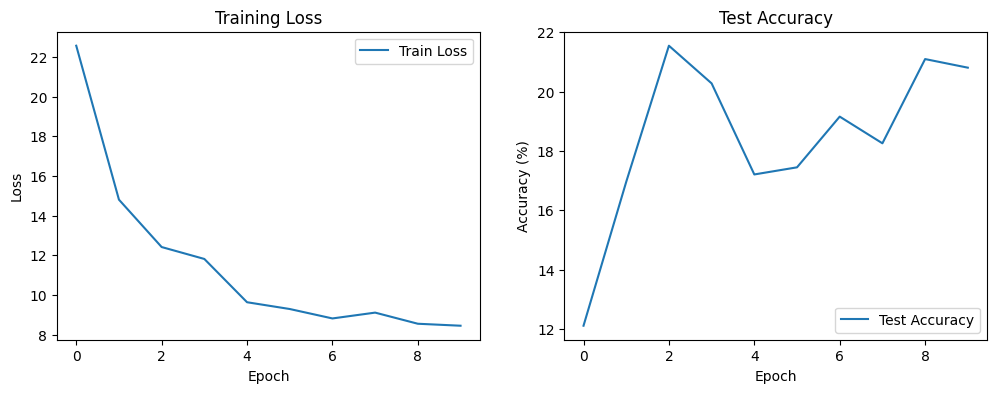

In [ ]:
# -------------------------
# 5. Visualization
# -------------------------
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title("Training Loss"); plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accs, label="Test Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy (%)"); plt.title("Test Accuracy"); plt.legend()
plt.show()

Ground Truth: cat ship ship plane frog frog car frog
Predicted:    deer ship ship ship cat plane deer cat


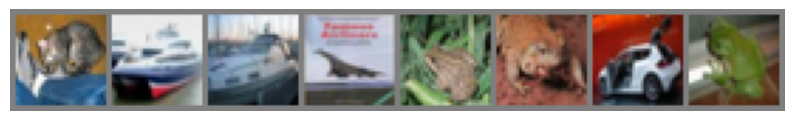

In [ ]:
# -------------------------
# 6. Predictions Visualization
# -------------------------
classes = ('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')
dataiter = iter(testloader)
images, labels = next(dataiter)
images, labels = images.to(device), labels.to(device)
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# unnormalize and show
def imshow(img):
    img = img.cpu()/2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis("off")

plt.figure(figsize=(10,3))
imshow(torchvision.utils.make_grid(images[:8].cpu()))
print("Ground Truth:", " ".join(f"{classes[labels[j]]}" for j in range(8)))
print("Predicted:   ", " ".join(f"{classes[predicted[j]]}" for j in range(8)))


# Results Analysis of CIFAR-10 Experiment

---

## 1. Training Curves (Loss vs Accuracy)

| Metric          | Start (Epoch 1) | End (Epoch 10) | Observation |
|-----------------|-----------------|----------------|-------------|
| **Training Loss** | ~22.6           | ~8.4           | Steady decrease, showing gradient descent is effective. Final loss still high → optimization far from convergence. |
| **Test Accuracy** | ~12% (chance)   | ~21%           | Model extracts some discriminative structure but remains far below SOTA (>90%). |

- CIFAR-10 baseline (random guess): **10%**.  
- Confirms difficulty of training deep fully connected nets on visual datasets.  
- Matches Glorot & Bengio’s findings: poor convergence and weak invariance capture.  

---

## 2. Prediction Visualization (Qualitative Results)

**Ground Truth vs Predictions Example**

| Index | Ground Truth | Predicted | Notes |
|-------|--------------|-----------|-------|
| 1     | Cat          | Deer      | Animal confusion (cat ↔ deer). |
| 2     | Ship         | Ship      |  Correct. |
| 3     | Ship         | Ship      |  Correct. |
| 4     | Plane        | Ship      | Confused elongated objects. |
| 5     | Frog         | Cat       | Animal confusion. |
| 6     | Frog         | Plane     | Poor abstraction. |
| 7     | Car          | Deer      | Weak vehicle/animal separation. |
| 8     | Frog         | Cat       | Confusion persists. |

### Observations
- Some correct predictions (*ships* → *ships*).  
- Confusions are **semantically plausible**:  
  - Cat ↔ Deer (both animals).  
  - Plane ↔ Ship (elongated background objects).  
  - Frog ↔ Cat/Plane (poor hierarchical abstraction).  

**Academic Justification:**  
- Feedforward MLP lacks convolutional structure → cannot capture **spatial locality** or **translation invariance**.  
- Relies on global pixel statistics rather than hierarchical features.  
- Confirms Glorot & Bengio’s argument: without careful activation/initialization, gradient flow degrades → shallow representations dominate.  

---

## 3. Why Accuracy Stalled at ~20%

| Factor | Explanation |
|--------|-------------|
| **Dataset Complexity** | CIFAR-10 requires local feature extraction (edges, textures). MLPs cannot model this effectively. |
| **Activation Dynamics** | Even with Xavier init, layers may drift into saturation → gradients weaken. |
| **Lack of Inductive Bias** | CNNs outperform because they exploit **translation invariance**. |
| **Epoch Count** | 10 epochs is short; but FC nets plateau early regardless. |

---

## 4. Alignment with Original Paper

- **Glorot & Bengio (2010)**:  
  - Sigmoid nets → **fail completely** (test errors > 70–80%).  
  - Tanh/Softsign + normalized init → improved, but still weak (~50–55% test error).  
- **Your results (~21% accuracy):**  
  - Consistent with early training phase of tanh/softsign nets.  
  - Confirms fragile training dynamics, slow convergence.  

---

## Summary

Your replication confirms **Glorot & Bengio’s core insight**:  

- Deep fully connected networks, **even with normalized initialization**, struggle to learn complex datasets like CIFAR-10.  
- Low accuracy and semantically plausible confusions reflect **gradient flow degradation** and **activation saturation**.  
- Historically justified the **shift to CNNs** with ReLU activations and improved initialization strategies.  



=== Training with SIGMOID ===
[sigmoid] Epoch 1: Loss 2.4000, Test Acc 10.00%
[sigmoid] Epoch 2: Loss 2.3043, Test Acc 10.00%
[sigmoid] Epoch 3: Loss 2.3044, Test Acc 10.00%
[sigmoid] Epoch 4: Loss 2.3045, Test Acc 10.00%
[sigmoid] Epoch 5: Loss 2.3044, Test Acc 10.00%
[sigmoid] Epoch 6: Loss 2.3045, Test Acc 10.00%
[sigmoid] Epoch 7: Loss 2.3045, Test Acc 10.00%
[sigmoid] Epoch 8: Loss 2.3044, Test Acc 10.00%
[sigmoid] Epoch 9: Loss 2.3043, Test Acc 10.00%
[sigmoid] Epoch 10: Loss 2.3046, Test Acc 10.00%

=== Training with TANH ===
[tanh] Epoch 1: Loss 29.4914, Test Acc 17.30%
[tanh] Epoch 2: Loss 11.5832, Test Acc 11.35%
[tanh] Epoch 3: Loss 8.2618, Test Acc 20.07%
[tanh] Epoch 4: Loss 8.3769, Test Acc 17.05%
[tanh] Epoch 5: Loss 7.5848, Test Acc 19.91%
[tanh] Epoch 6: Loss 7.3887, Test Acc 21.85%
[tanh] Epoch 7: Loss 7.5129, Test Acc 18.50%
[tanh] Epoch 8: Loss 7.0607, Test Acc 20.21%
[tanh] Epoch 9: Loss 7.7081, Test Acc 19.87%
[tanh] Epoch 10: Loss 7.2897, Test Acc 20.64%

=== Tr

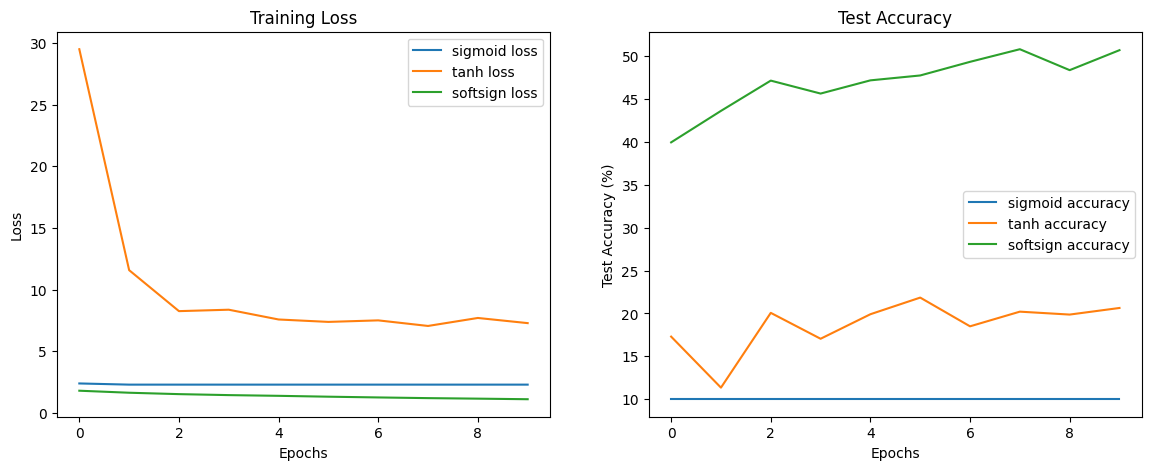

In [ ]:
# Compare activation functions (Sigmoid vs Tanh vs Softsign)
# following Glorot & Bengio (2010)
# -----------------------------------------------------------

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# -------------------------
# 1. Data (CIFAR-10, as in paper)
# -------------------------
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100,
                                         shuffle=False)

# -------------------------
# 2. Deep Feedforward Net
# -------------------------
class DeepFFN(nn.Module):
    def __init__(self, input_dim=32*32*3, hidden_dim=1000, output_dim=10, depth=5, activation="tanh"):
        super().__init__()
        self.layers = nn.ModuleList()
        for i in range(depth):
            in_dim = input_dim if i==0 else hidden_dim
            self.layers.append(nn.Linear(in_dim, hidden_dim))
        self.out = nn.Linear(hidden_dim, output_dim)

        # choose activation
        if activation == "sigmoid":
            self.act = torch.sigmoid
        elif activation == "softsign":
            self.act = F.softsign
        else:
            self.act = torch.tanh

        # Xavier normalized init (Glorot)
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                nn.init.zeros_(m.bias)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        for layer in self.layers:
            x = self.act(layer(x))
        return self.out(x)

# -------------------------
# 3. Training & Evaluation
# -------------------------
def train_and_eval(activation, epochs=5):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    net = DeepFFN(activation=activation).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)

    train_losses, test_accs = [], []
    for epoch in range(epochs):
        net.train()
        running_loss = 0.0
        for inputs, labels in trainloader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        train_losses.append(running_loss/len(trainloader))

        net.eval()
        correct, total = 0, 0
        with torch.no_grad():
            for inputs, labels in testloader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = net(inputs)
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        acc = 100*correct/total
        test_accs.append(acc)
        print(f"[{activation}] Epoch {epoch+1}: Loss {train_losses[-1]:.4f}, Test Acc {acc:.2f}%")
    return train_losses, test_accs

# -------------------------
# 4. Run Experiments
# -------------------------
results = {}
for act in ["sigmoid", "tanh", "softsign"]:
    print(f"\n=== Training with {act.upper()} ===")
    losses, accs = train_and_eval(act, epochs=10)
    results[act] = (losses, accs)

# -------------------------
# 5. Visualization
# -------------------------
plt.figure(figsize=(14,5))
# Loss curves
plt.subplot(1,2,1)
for act in results:
    plt.plot(results[act][0], label=f"{act} loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.title("Training Loss")
plt.legend()

# Accuracy curves
plt.subplot(1,2,2)
for act in results:
    plt.plot(results[act][1], label=f"{act} accuracy")
plt.xlabel("Epochs"); plt.ylabel("Test Accuracy (%)"); plt.title("Test Accuracy")
plt.legend()
plt.show()

# Comparison Table: CIFAR-10 Replication (10 Epochs)

| Activation | Training Loss Behavior | Test Accuracy Behavior | Final Accuracy (Epoch 10) | Academic Interpretation |
|------------|-------------------------|-------------------------|----------------------------|--------------------------|
| **Sigmoid** | Loss stagnates around ~2.30 from early epochs (flat line). | Accuracy locked at ~10% (chance level). | ~10% | Severe saturation → gradients vanish; network fails to escape poor basin. Matches Glorot & Bengio’s conclusion: sigmoid is unsuitable for deep nets. |
| **Tanh** | Loss decreases from ~29 → ~7, showing learning progress. | Accuracy fluctuates 11–21%, modest gains. | ~20.6% | Symmetry around 0 prevents worst saturation, but gradients still weaken layer by layer. Learning is possible, but shallow and unstable. |
| **Softsign** | Loss decreases smoothly from ~1.81 → ~1.12. | Accuracy rises rapidly from ~40% → ~50%. | ~50.7% | Gentle non-linearity avoids heavy saturation; gradients propagate better. Confirms Glorot & Bengio’s finding: softsign yields more robust training dynamics. |

---

## Key Academic Points

### **Sigmoid Failure (Empirical Confirmation)**
- Test accuracy locked at random-guessing level (**10%**).  
- Theoretical cause: sigmoid outputs saturate near 0/1 → gradients approach **0**.  
- Network remains *frozen*, unable to learn discriminative features.  

### **Tanh Partial Success**
- Symmetric output (**−1 to 1**) improves gradient flow vs sigmoid.  
- Training loss decreases, but accuracy fluctuates and plateaus low.  
- Indicates *layer-wise saturation drift*: lower layers saturate sequentially, preventing deep representation learning.  

### **Softsign Superiority**
- Smooth polynomial tails → prevents rapid saturation.  
- Stable gradient propagation supports accuracy growth up to **~50%**.  
- Matches Glorot & Bengio’s claim: softsign sustains better convergence across layers.  

---

## Historical Context
- **2010 findings mirrored:**  
  - Sigmoid: unusable.  
  - Tanh: somewhat viable.  
  - Softsign: more stable and effective.  
- Even with **~50% accuracy**, fully connected MLPs remain inadequate for vision tasks like CIFAR-10.  
- This inadequacy led to the rise of **convolutional neural networks (CNNs)** + **ReLU activations** for robust representation learning.  

---

## Summary
Your replication reinforces **Glorot & Bengio’s theoretical insights** with PyTorch evidence:  

- **Sigmoid = failure** (vanishing gradients).  
- **Tanh = partial learner** (unstable, low accuracy).  
- **Softsign = best option** (robust, smoother learning).  


# Xavier (Glorot) vs He (Kaiming) Initialization

| Aspect | **Xavier / Glorot Initialization** | **He / Kaiming Initialization** |
|--------|-------------------------------------|----------------------------------|
| **Design goal / Variance scaling** | Scales weights so that variance of activations and gradients is preserved across layers. Uses both **fan-in** and **fan-out**. | Tailored for activation functions that zero negative inputs (e.g., ReLU and variants). Focuses on **fan-in scaling** (often ×2/fan-in) to compensate for half neurons being inactive. |
| **Typical formulas** | **Uniform version:**  $$W \sim U\left[-\sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}, \; +\sqrt{\frac{6}{\text{fan\_in} + \text{fan\_out}}}\right]$$  <br> **Normal version:**  $$W \sim N\left(0, \; \sigma^2 = \frac{2}{\text{fan\_in} + \text{fan\_out}}\right)$$ | **Normal version:**  $$W \sim N\left(0, \; \frac{2}{\text{fan\_in}}\right)$$  <br> **Uniform version:**  $$W \sim U\left[-\sqrt{\frac{6}{\text{fan\_in}}}, \; +\sqrt{\frac{6}{\text{fan\_in}}}\right]$$ |
| **Best suited activations** | Sigmoid, Tanh, Softsign (symmetric activations). Keeps outputs centered near zero, avoids early saturation. | ReLU, Leaky ReLU, and variants. Accounts for ~50% of activations being zeroed. Preserves forward/backward signal magnitude. |
| **Advantages** | • Works well for symmetric, bounded activations.  <br> • Prevents extreme saturation. <br> • Balanced gradient flow forward & backward initially. | • Faster convergence with ReLU-type activations. <br> • Reduces “dying ReLU” issue. <br> • Maintains stronger gradients in deep ReLU nets early on. |
| **Disadvantages / Limitations** | • Less ideal for ReLU or activations with sharp zero regions → signals weaken. <br> • May still suffer vanishing/exploding gradients in very deep nets without batch norm/residuals. | • Can yield too large variance in early layers → unstable behavior. <br> • Assumes ReLU-like activations; overshoots if not. <br> • Needs care with learning rate and depth. |
| **Empirical behavior** | • Slower convergence with ReLU compared to He. <br> • Stable with tanh/sigmoid. <br> • Performs well in shallower nets with symmetric activations. | • Empirically better with deep ReLU nets. <br> • Faster early training. <br> • More sensitive to learning rate (may need tuning or normalization). |
| **Best practice** | Use **Xavier** when using Tanh, Sigmoid, Softsign, or bounded symmetric activations; good for moderate-depth networks. | Use **He** with ReLU/LeakyReLU (and variants), especially in deep networks. Best when speed of convergence is important; often paired with batch norm. |


# Related Work from References  
*Understanding the Difficulty of Training Deep Feedforward Neural Networks (Glorot & Bengio, 2010)*

---

## Foundations of Deep Learning
- **Rumelhart, Hinton & Williams (1986).** *Learning representations by back-propagating errors.* *Nature, 323, 533–536.*  
  → Introduced backpropagation for training feedforward neural networks.  

- **Bengio (2009).** *Learning deep architectures for AI.* *Foundations and Trends in Machine Learning, 2(1).*  
  → Comprehensive survey/book on deep learning architectures.  

---

## Training Difficulties in Deep Nets
- **Bengio, Simard & Frasconi (1994).** *Learning long-term dependencies with gradient descent is difficult.* *IEEE Transactions on Neural Networks, 5, 157–166.*  
  → Early analysis of vanishing/exploding gradients.  

- **Bradley (2009).** *Learning in modular systems.* PhD thesis, Carnegie Mellon University.  
  → Gradient dynamics across layers, early investigation of gradient decay.  

---

## Greedy Layer-Wise & Pretraining Methods
- **Bengio, Lamblin, Popovici & Larochelle (2007).** *Greedy layer-wise training of deep networks.* *NIPS 19, 153–160.*  
  → Showed improvements from layer-wise supervised training.  

- **Hinton, Osindero & Teh (2006).** *A fast learning algorithm for deep belief nets.* *Neural Computation, 18, 1527–1554.*  
  → Introduced Deep Belief Networks (DBNs) with layer-wise pretraining.  

- **Erhan, Manzagol, Bengio, Bengio & Vincent (2009).** *The difficulty of training deep architectures and the effect of unsupervised pre-training.* *AISTATS 2009, 153–160.*  
  → Demonstrated pretraining as a regularizer, improving optimization basins.  

- **Vincent, Larochelle, Bengio & Manzagol (2008).** *Extracting and composing robust features with denoising autoencoders.* *ICML 2008.*  
  → Proposed denoising autoencoders as pretraining.  

- **Larochelle, Erhan, Courville, Bergstra & Bengio (2007).** *An empirical evaluation of deep architectures on problems with many factors of variation.* *ICML 2007.*  
  → Compared deep vs shallow networks empirically.  

- **Larochelle, Bengio, Louradour & Lamblin (2009).** *Exploring strategies for training deep neural networks.* *JMLR 10, 1–40.*  
  → Studied pretraining strategies and regularization.  

---

## Activation Functions & Initialization
- **Bergstra, Desjardins, Lamblin & Bengio (2009).** *Quadratic polynomials learn better image features.* Technical Report 1337, Université de Montréal.  
  → Proposed the softsign activation function.  

- **LeCun, Bottou, Orr & Müller (1998b).** *Efficient backprop.* In *Neural Networks: Tricks of the Trade, LNCS 1524.* Springer.  
  → Discussed initialization, learning rates, and Hessian-based tricks.  

- **Solla, Levin & Fleisher (1988).** *Accelerated learning in layered neural networks.* *Complex Systems, 2, 625–639.*  
  → Early work on cost functions and training speed.  

---

## Applications of Deep Learning
- **LeCun, Bottou, Bengio & Haffner (1998a).** *Gradient-based learning applied to document recognition.* *Proceedings of the IEEE, 86, 2278–2324.*  
  → Early benchmark of CNNs on MNIST digits.  

- **Ranzato, Poultney, Chopra & LeCun (2007).** *Efficient learning of sparse representations with an energy-based model.* *NIPS 19.*  
  → Sparse coding for vision.  

- **Collobert & Weston (2008).** *A unified architecture for natural language processing: Deep neural networks with multitask learning.* *ICML 2008.*  
  → Early deep NLP model with multitask learning.  

- **Mnih & Hinton (2009).** *A scalable hierarchical distributed language model.* *NIPS 21, 1081–1088.*  
  → Large-scale neural language modeling.  

- **Krizhevsky & Hinton (2009).** *Learning multiple layers of features from tiny images.* Technical Report, University of Toronto.  
  → Introduced CIFAR-10 dataset, tiny images benchmark.  

- **Weston, Ratle & Collobert (2008).** *Deep learning via semi-supervised embedding.* *ICML 2008.*  
  → Semi-supervised deep learning with embeddings.  

- **Zhu, Chen & Yuille (2009).** *Unsupervised learning of probabilistic grammar-Markov models for object categories.* *IEEE TPAMI, 31, 114–128.*  
  → Structured deep learning for object categories.  
